<a href="https://colab.research.google.com/github/rpatel71/Design-Optimization/blob/main/hw2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2(b)

In [7]:
import numpy
from matplotlib import pyplot
from numpy import linalg as la

Taking unconstrained function by substituting x1 = 1 - (2 * x2 + 3 * x3). Here, x[0] is x2 and x[1] is x3.

In [4]:
function = lambda x: (2 - 2*x[0] - 3*x[1])**2 + (x[0])**2 + (x[1] - 1)**2

def grad(x):
  gradient = numpy.array([(10*x[0] + 12*x[1] - 8), (12*x[0] + 20*x[1] - 14)])
  return gradient


Hes = numpy.array([[10,12], [12,20]]) 

Line-search algorithm

In [3]:
def line_search(x):
  t = 0.20
  alpha = 1
  def phi(x, alpha):
    phi = function(x) - t * alpha * numpy.matmul(numpy.transpose(grad(x)), -1*grad(x))
    return phi
  while function(x - alpha * grad(x)):
    alpha = alpha/2
    return alpha

Gradient-descent algorithm

In [32]:
def grad_descent(function, grad, Hes, iterations, x_0):
  x_k = x_0
  # k is current number of iterations.
  k = 0
  iter = [k]
  g_norm = la.norm(grad(x_0))
  g_norm_data = []
  g_norm_data.append(g_norm)
  resp = []
  resp.append(x_0)
  for x in range(1, iterations):
    if g_norm> 1e-05:
      alpha = line_search(x_k)
      x_k = x_k - alpha*(grad(x_k))
      resp.append(x_k)
      g_norm = la.norm(grad(x_k))
      g_norm_data.append(g_norm)
      iter.append(x)
      if k == iterations:
        print(f'iterations have surpassed.The error is: {g_norm}')
  return resp, g_norm_data, x_k, iter
  error_data = []
  print(range(len(resp)))
  for x in range(len(resp)):
    error = abs(function(resp[x]) - function([-1/7, 11/14]))
    error_data.append(error)
  x1 = 1 - (2*x[0] + 3*x[1])
  print(f'The convergence taken place in {k}')
  print(f'x1 = {x1}, x2 = {x_k[0]} and x3 = {x_k[1]}')
  return x_k, error_data, resp, iter

Newton's Method

In [ ]:
def newton_method(function, grad, Hes, iterations, x_0):
  x_k = x_0
  # k is current number of iterations.
  k = 0
  g_norm = la.norm(grad(x_0))
  g_norm_data = []
  g_norm_data.append(g_norm)
  resp = []
  resp.append(x_0)
  for x in range(k, iterations+1):
    if g_norm> 1e-05:
      x_k = x_k - numpy.matmul(la.inv(Hes), grad(x_k))
      resp.append(x_k)
      g_norm = la.norm(grad(x_k))
      g_norm_data.append(g_norm)
      if k == iterations:
        print(f'iterations have surpassed. The error is: {g_norm}')
  return resp, g_norm_data, x_k, k
  error_data = []
  for x in range(len(resp)):
    error = abs(function(resp[x]) -  function([-1/7, 11/14]))
    error_data.append(error)
  x1 = 1 - (2*x[0] + 3*x[1])
  print(f'The convergence taken place in {k}')
  print(f'x1 = {x1}, x2 = {x_k[0]} and x3 = {x_k[1]}')
  return x_k, error_data, resp, k

Plots

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[16.1245154965971, 209.1219739769114, 2718.585661699848, 35341.61360209803, 459440.9768272743, 5972732.698754566, 77645525.08380936, 1009391826.0895216, 13122093739.16378, 170587218609.12915, 2217633841918.679, 28829239944942.83, 374780119284256.75, 4872141550695338.0, 6.333784015903939e+16, 8.23391922067512e+17, 1.070409498687766e+19, 1.3915323482940955e+20, 1.8089920527823243e+21, 2.3516896686170217e+22, 3.057196569202128e+23, 3.9743555399627665e+24, 5.166662201951597e+25, 6.716660862537077e+26, 8.731659121298199e+27, 1.1351156857687659e+29, 1.4756503914993955e+30, 1.918345508949214e+31, 2.4938491616

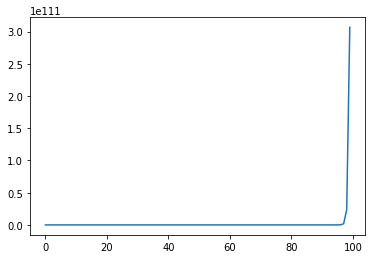

In [29]:
fig, ax = pyplot.subplots()
iterations = 100
x_0 = numpy.array([0, 0])
x_k, error_data, resp, k = grad_descent(function, grad, Hes, iterations, x_0)
#print(k)
#print(error_data)
ax.plot(k, error_data, c='C0')
ax.set_yscale = ("log")